# Business Intelligence Analysis
___

In [510]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#seaborn styling
sns.set(style="whitegrid")

import statsmodels.api as sm

In [511]:
df = pd.read_csv("main_df.csv",low_memory=False)

In [512]:
df.timestamp = pd.to_datetime(df.timestamp)

In [513]:
df.head()

,acn,trans_id,timestamp,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
0,11,37777,2015-08-12 16:03:00,Core Power,Beverage,2.80,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
1,11,38361,2015-08-21 08:02:00,Berries Amore,Beverage,4.28,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2,11,38360,2015-08-21 08:02:00,Smoothie Add-On,Beverage,0.67,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
3,11,35130,2015-07-24 11:53:00,$2.00 Ice Cream,Food & Consumables,2.00,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
4,11,35131,2015-07-24 11:53:00,$2.00 Ice Cream,Food & Consumables,2.00,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar


In [514]:
dft = df.sort_values("timestamp").set_index("timestamp")

In [515]:
df[df.item_group== "Membership Dues"]

,acn,trans_id,timestamp,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
408,33,173790,2018-08-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
411,33,168397,2018-07-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
412,33,185439,2018-11-30 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
421,33,188615,2018-12-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
423,33,177579,2018-09-30 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
425,33,181618,2018-10-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
427,33,162501,2018-06-30 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
429,33,160636,2018-06-22 10:42:00,Membership for &quot;General Family Membership...,Membership Dues,44.82,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
430,33,226421,2019-08-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin
435,33,215971,2019-06-30 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,149.39,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Admin


## What's the dollar value per month/year per membership type

In [516]:
dft.groupby("membership").resample("Y")[["total"]].sum()

total
membership                timestamp            
General Family Membership 2015-12-31  588810.39
                          2016-12-31  617225.31
                          2017-12-31  646217.50
                          2018-12-31  727211.36
                          2019-12-31  786336.45
General Property Owner    2015-12-31   86122.27
                          2016-12-31  105687.56
                          2017-12-31  108568.36
                          2018-12-31  112082.36
                          2019-12-31  133929.36
General Single Membership 2015-12-31   98014.72
                          2016-12-31  120319.47
                          2017-12-31  143022.74
                          2018-12-31  174165.52
                          2019-12-31  192511.30
Guest                     2015-12-31   56773.24
                          2016-12-31   36161.31
                          2017-12-31   34931.21
                          2018-12-31   55521.34
                          2019-12-31   78350.89
Misc. Membership          2015-12-31   11300.56
                          2016-12-31   10564.82
                          2017-12-31   11488.71
                          2018-12-31   11343.70
                          2019-12-31   14509.63
ND Owner Membership       2015-12-31    4217.65
                          2016-12-31    2610.06
                          2017-12-31    1656.75
                          2018-12-31    4010.32
                          2019-12-31    5753.95
Premier Family Membership 2015-12-31  103394.31
                          2016-12-31   83403.44
                          2017-12-31   83082.73
                          2018-12-31   84426.36
                          2019-12-31   82638.87
Premier Single Membership 2015-12-31   11946.21
                          2016-12-31   10488.84
                          2017-12-31   14275.17
                          2018-12-31   16476.12
                          2019-12-31   17967.87
Veramendi Teacher         2019-12-31     889.35

In [517]:
dft.groupby("membership").resample("Y")[["total"]].mean()

total
membership                timestamp            
General Family Membership 2015-12-31  44.515793
                          2016-12-31  50.650362
                          2017-12-31  49.728165
                          2018-12-31  39.541698
                          2019-12-31  35.372760
General Property Owner    2015-12-31  23.537106
                          2016-12-31  28.789856
                          2017-12-31  26.351544
                          2018-12-31  22.762461
                          2019-12-31  22.976387
General Single Membership 2015-12-31  44.370629
                          2016-12-31  50.258759
                          2017-12-31  49.574607
                          2018-12-31  38.910974
                          2019-12-31  37.643977
Guest                     2015-12-31  61.844488
                          2016-12-31  33.732565
                          2017-12-31  36.500742
                          2018-12-31  37.063645
                          2019-12-31  46.306673
Misc. Membership          2015-12-31  22.466322
                          2016-12-31  27.158920
                          2017-12-31  23.162722
                          2018-12-31  16.416353
                          2019-12-31  14.423091
ND Owner Membership       2015-12-31  10.237015
                          2016-12-31   7.744985
                          2017-12-31   4.100866
                          2018-12-31   5.134853
                          2019-12-31   9.954931
Premier Family Membership 2015-12-31  41.927944
                          2016-12-31  48.405943
                          2017-12-31  49.016360
                          2018-12-31  50.283716
                          2019-12-31  38.082429
Premier Single Membership 2015-12-31  31.109922
                          2016-12-31  34.962800
                          2017-12-31  36.048409
                          2018-12-31  35.055574
                          2019-12-31  28.840883
Veramendi Teacher         2019-12-31  52.314706

In [518]:
dft.groupby("membership").resample("MS")[["total"]].mean()

total
membership                timestamp             
General Family Membership 2015-01-01   54.639328
                          2015-02-01   58.841084
                          2015-03-01   55.402413
                          2015-04-01   43.317202
                          2015-05-01   38.781020
                          2015-06-01   35.132296
                          2015-07-01   34.765537
                          2015-08-01   39.200127
                          2015-09-01   43.413787
                          2015-10-01   48.368082
                          2015-11-01   56.270148
                          2015-12-01   54.623659
                          2016-01-01   49.994205
                          2016-02-01   50.374013
                          2016-03-01   49.982528
                          2016-04-01   49.894967
                          2016-05-01   43.455356
                          2016-06-01   41.353426
                          2016-07-01   45.314489
                          2016-08-01   56.617371
                          2016-09-01   60.952185
                          2016-10-01   50.237008
                          2016-11-01   57.123124
                          2016-12-01   67.699390
                          2017-01-01   56.853933
                          2017-02-01   60.458708
                          2017-03-01   48.819594
                          2017-04-01   54.355304
                          2017-05-01   42.281384
                          2017-06-01   38.908888
...                                          ...
Premier Single Membership 2017-11-01   30.526383
                          2017-12-01   50.590000
                          2018-01-01   40.860000
                          2018-02-01   71.622308
                          2018-03-01   45.562105
                          2018-04-01   47.987561
                          2018-05-01   26.943878
                          2018-06-01   25.292727
                          2018-07-01   34.302821
                          2018-08-01   28.943333
                          2018-09-01   35.142250
                          2018-10-01   30.499474
                          2018-11-01   33.771563
                          2018-12-01   32.529070
                          2019-01-01   27.296721
                          2019-02-01   29.060196
                          2019-03-01   36.116119
                          2019-04-01   33.769184
                          2019-05-01   24.960980
                          2019-06-01   32.086897
                          2019-07-01   22.662540
                          2019-08-01   27.157119
                          2019-09-01   25.505094
                          2019-10-01   27.812195
                          2019-11-01   35.492683
                          2019-12-01   26.990000
Veramendi Teacher         2019-09-01  105.000000
                          2019-10-01  105.000000
                          2019-11-01   65.160000
                          2019-12-01   32.043333

[484 rows x 1 columns]

In [519]:
(dft
 .groupby(dft.index.strftime('%B'))
 .total
 .sum()
 .sort_values()
)

December     390608.35
November     415112.79
October      428574.53
February     432003.59
September    440010.57
March        460859.85
January      463240.72
June         478639.19
August       479517.60
April        485788.00
May          488102.61
July         525950.28
Name: total, dtype: float64

In [520]:
(dft
 .groupby(dft.index.strftime('%Y'))
 .total
 .sum()
 .sort_values()
)

2015     960579.35
2016     986460.81
2017    1043243.17
2018    1185237.08
2019    1312887.67
Name: total, dtype: float64

In [521]:
(dft
 .groupby([dft.index.strftime('%Y'),"membership"])
 [["total"]]
 .sum()
)

total
     membership                          
2015 General Family Membership  588810.39
     General Property Owner      86122.27
     General Single Membership   98014.72
     Guest                       56773.24
     Misc. Membership            11300.56
     ND Owner Membership          4217.65
     Premier Family Membership  103394.31
     Premier Single Membership   11946.21
2016 General Family Membership  617225.31
     General Property Owner     105687.56
     General Single Membership  120319.47
     Guest                       36161.31
     Misc. Membership            10564.82
     ND Owner Membership          2610.06
     Premier Family Membership   83403.44
     Premier Single Membership   10488.84
2017 General Family Membership  646217.50
     General Property Owner     108568.36
     General Single Membership  143022.74
     Guest                       34931.21
     Misc. Membership            11488.71
     ND Owner Membership          1656.75
     Premier Family Membership   83082.73
     Premier Single Membership   14275.17
2018 General Family Membership  727211.36
     General Property Owner     112082.36
     General Single Membership  174165.52
     Guest                       55521.34
     Misc. Membership            11343.70
     ND Owner Membership          4010.32
     Premier Family Membership   84426.36
     Premier Single Membership   16476.12
2019 General Family Membership  786336.45
     General Property Owner     133929.36
     General Single Membership  192511.30
     Guest                       78350.89
     Misc. Membership            14509.63
     ND Owner Membership          5753.95
     Premier Family Membership   82638.87
     Premier Single Membership   17967.87
     Veramendi Teacher             889.35

In [522]:
(dft
 .groupby([dft.index.strftime('%Y'),"membership","acn"])
 [["total"]]
 .sum()
)

total
     membership                acn          
2015 General Family Membership 33      55.40
                               34      27.00
                               42     610.44
                               64    1688.76
                               65    1701.50
                               66    7539.18
                               67    2619.12
                               68    1548.03
                               69    1830.45
                               70     562.92
                               71    6462.34
                               72    1688.76
                               73    1779.08
                               74    1814.76
                               75     791.34
                               76    2962.10
                               77    2351.51
                               78    1688.76
                               80    1566.43
                               81    1974.68
                               82     889.96
                               83    1841.55
                               84    1706.61
                               85     281.46
                               86     985.11
                               88    1182.75
                               89    2361.97
                               90     985.11
                               91    1812.26
                               92    1739.01
...                                      ...
2019 Premier Family Membership 1168   530.00
                               1173  1742.48
                               1301  2223.17
                               1302   281.06
                               1698  2393.16
                               2234   869.19
                               2285   389.76
                               2472   110.00
                               2519  2032.68
                               2520  1458.00
                               2552   292.91
                               2553   561.20
                               2554    68.20
                               2826  5201.92
                               3042  2773.26
                               3325   266.30
                               3327     5.84
                               3328     2.02
                               3462   178.61
                               4382  6505.03
                               4383   140.07
                               4384   277.26
                               5145  1498.46
     Premier Single Membership 350   9230.77
                               351   5764.20
                               1870  2051.90
                               2427   921.00
     Veramendi Teacher         5207   423.15
                               5208   210.00
                               5378   256.20

[6225 rows x 1 columns]

In [523]:
yearly = dft.groupby([dft.index.strftime('%Y'),"category"]).sum().reset_index().rename(columns={"level_0":"year"})

In [524]:
yearly

,year,category,acn,trans_id,total,zipcode,lat,long
0,2015,Admin,1168391,104236599,458715.43,8750742.0,3330.187445,-10997.391501
1,2015,Bar,7018302,353773342,48245.24,35784097.0,13617.615050,-44965.973482
2,2015,Event,446221,25633370,17979.92,1093844.0,416.269436,-1374.784661
3,2015,Fitness,1155049,56081488,99960.68,6406692.0,2437.419334,-8047.563548
4,2015,Pro Shop,937059,44913786,38211.14,7735025.0,2943.936082,-9719.658620
5,2015,Program,424372,10897157,62580.28,5392621.0,2052.434033,-6774.565248
6,2015,Tennis,3074119,155320430,234886.66,18907665.0,7195.222277,-23764.589510
7,2016,Admin,2475154,276416968,485546.46,35237126.0,13407.700124,-44281.802711
8,2016,Bar,8154985,730411201,47185.83,103266572.0,39309.345011,-129742.245134
9,2016,Event,742488,62953683,30758.63,8044477.0,3062.638234,-10105.292725


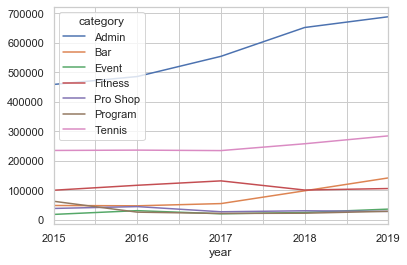

In [525]:
yearly.pivot_table("total","year","category").plot()

In [526]:
yearly_mem = dft.groupby([dft.index.strftime('%Y'),"membership"]).sum().reset_index().rename(columns={"level_0":"year"})

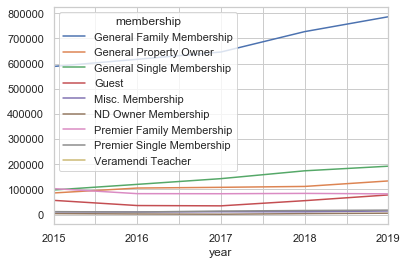

In [527]:
yearly_mem.pivot_table("total","year","membership").plot()

In [528]:
ypy = dft.groupby([dft.index.strftime('%Y')]).sum().reset_index()

In [529]:
ypy.head()

,index,acn,trans_id,total,zipcode,lat,long
0,2015,14223513,750856172,960579.35,84070686.0,31993.083657,-105644.526571
1,2016,18843855,1719904412,986460.81,242101475.0,92137.972615,-304193.432547
2,2017,25905297,2878207666,1043243.17,405050250.0,154073.956513,-508954.821515
3,2018,48655414,5469094090,1185237.08,497701392.0,189235.445612,-625326.785632
4,2019,76141717,8497580877,1312887.67,497416771.0,189090.868536,-624709.358937


## What is driving Sales at JNCC

### Summary of Insights

1. Monthly membership is the primary driver of sales.
2. Between 2018-2019, there's a high increase in sales from Gen Family, Gen Single members.
    - Same trend is true for Premier Family Membership, Misc. Membership
    - While Gen Property Owner member sales dropped in 2018 fiscal year

In [530]:
df[df.category == "Program"].total.describe()

count    1060.000000
mean      150.983943
std        91.658046
min         0.010000
25%        60.000000
50%       160.000000
75%       225.000000
max      1232.800000
Name: total, dtype: float64

In [531]:
df[(df.category == "Program") & (df.item_group== "Teen Performance Camp")].total.min()

18.5

In [532]:
df[df.category=="Admin"].item_group.unique()

array(['Guest Fee', 'Membership Dues', 'Food Allowance',
       'Membership Initiation', 'Homeowner Membership Initiation',
       'Facility Rental', 'Sponsorship'], dtype=object)

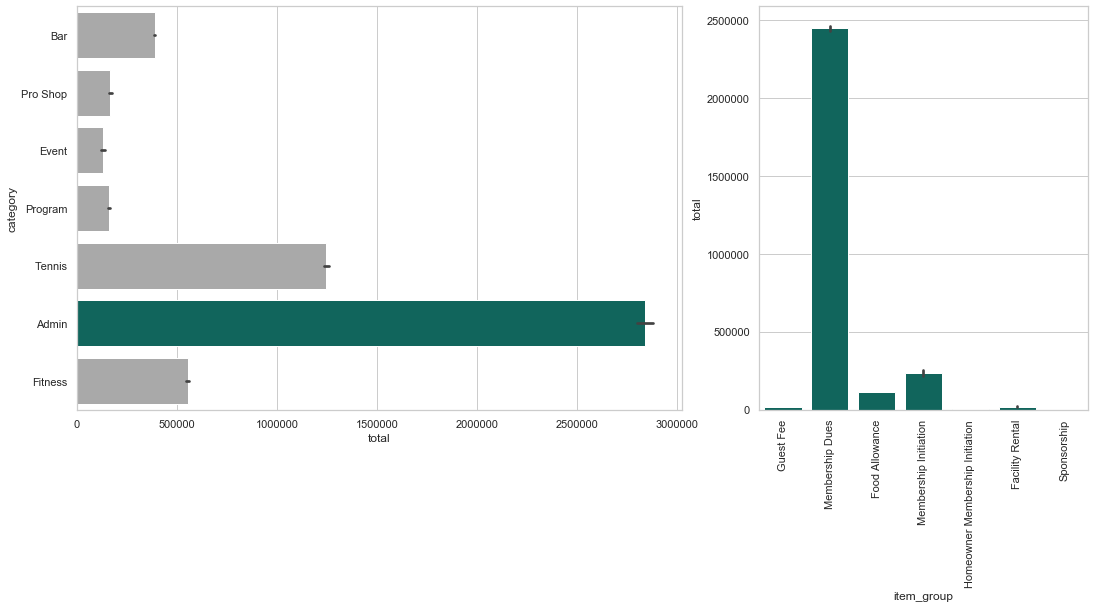

In [533]:
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_axes([0.1,0.1,0.7,0.8])
ax2 = fig.add_axes([0.89,0.1,0.38,0.8])

# ax1
fig1 = sns.barplot(x="total",y="category",data=df,palette=["darkgray","darkgray","darkgray","darkgray","darkgray","#037367"],ax=ax1,estimator=sum)
# ax2
fig2 = sns.barplot(x="item_group",y="total",data=df[df.category == "Admin"],color="#037367",ax=ax2,estimator=sum)

ax2.set_xticklabels(labels=list(df[df.category == "Admin"].item_group.unique()),rotation = 90)
plt.show()

### All Product Categories Except Memberships

In [534]:
category_list = ["Bar","Tennis","Pro Shop", "Program", "Fitness", "Event"]

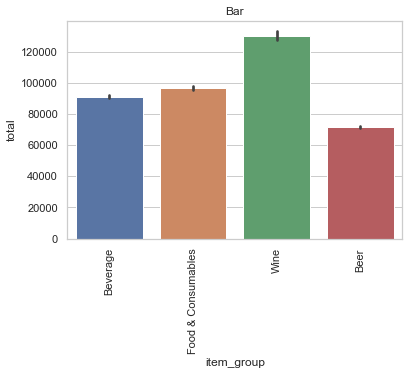

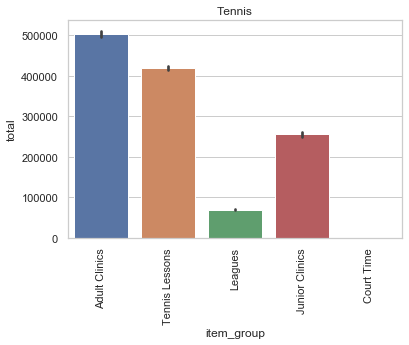

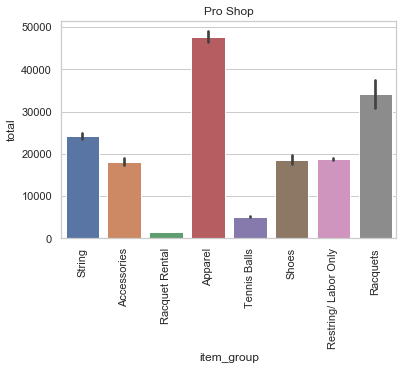

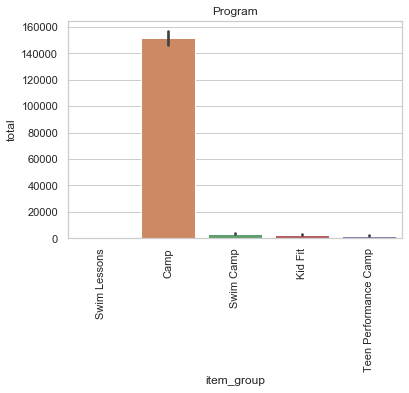

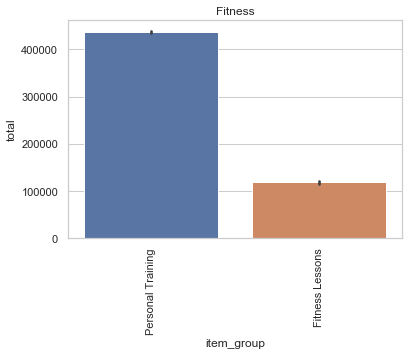

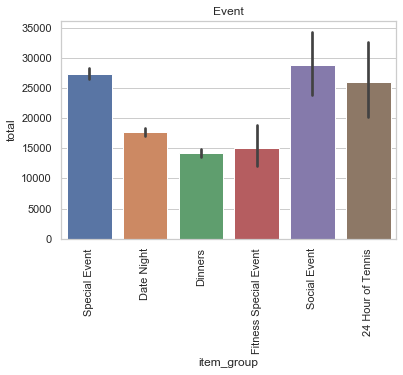

In [535]:
for cat in category_list:
    ax = sns.barplot(data=df[df["category"] == cat], x=df["item_group"][df["category"]== cat], y="total",estimator=sum)
    
    plt.title(cat)
    ax.set_xticklabels(labels=list(df[df["category"] == cat].item_group.unique()),rotation = 90)
    plt.show()

### Zooming In On Memberships

In [536]:
membership = df[df.category=="Admin"].sort_values("timestamp").set_index("timestamp")

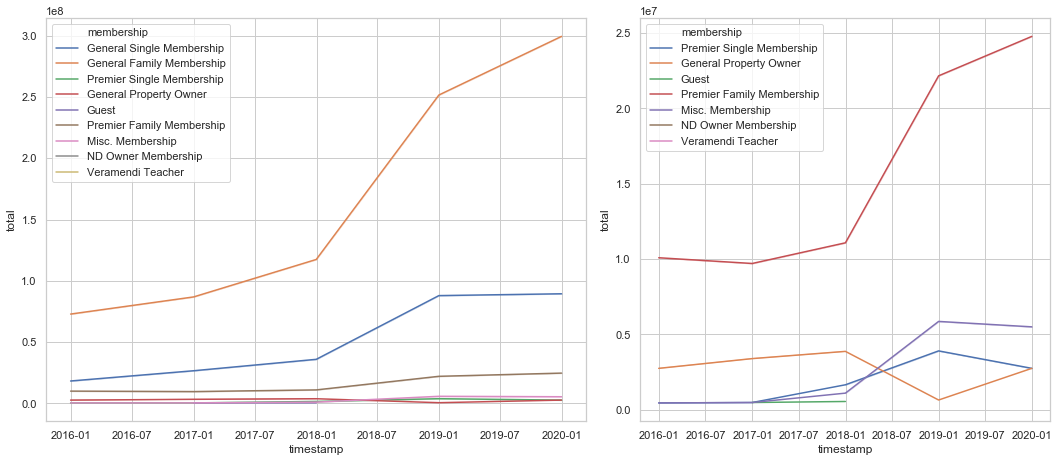

In [537]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_axes([0.1,0.1,0.5,0.8])
ax2 = fig.add_axes([0.65,0.1,0.38,0.8])

# ax1
fig1 =  sns.lineplot(x=membership.index,y=membership.total.resample("Y").sum(),hue="membership",data=membership, estimator=sum,ax=ax1)
# ax2
fig2 =  sns.lineplot(x=membership[~membership.membership.isin(["General Single Membership","General Family Membership"])].index,y=membership.total.resample("Y").sum(),hue="membership",data=membership[~membership.membership.isin(["General Single Membership","General Family Membership"])], estimator=sum,ax=ax2)

plt.show()


### Sales patterns of Gen Family and Gen Single members

What is the monthly spending of GF and GS members?

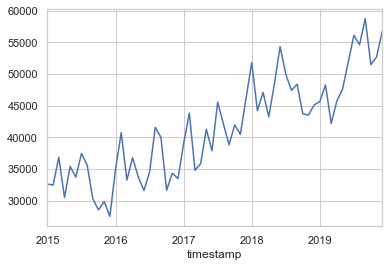

In [538]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").sum().plot()

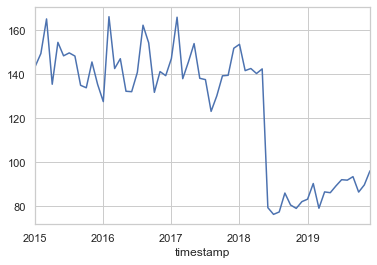

In [539]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").mean().plot()

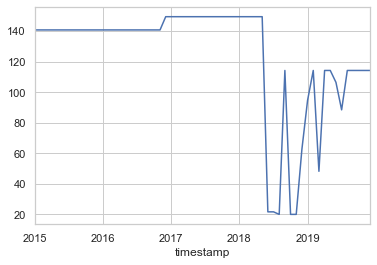

In [540]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").median().plot()

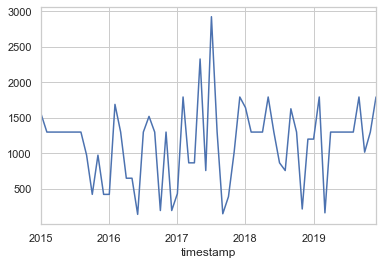

In [541]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").max().plot()

> It seems like the average membership cost per month dropped in the early half of 2018. Policy changes?

In [542]:
dg = dfdt[dfdt.membership.isin(["General Family Membership","General Single Membership"])]

In [543]:
dg.head()

,acn,trans_id,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
timestamp,,,,,,,,,,,,,
2015-01-01 00:00:00,464,8195,Membership for &quot;1 HR MONTHLY GENERAL EFT ...,Adult Clinics,75.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 10:56:00,188,8239,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,220.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 10:58:00,66,8240,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,220.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 11:02:00,671,8243,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,110.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 11:04:00,242,8245,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,220.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis


In [544]:
dg.category.unique()

array(['Tennis', 'Bar', 'Program', 'Pro Shop', 'Admin', 'Event',
       'Fitness'], dtype=object)

In [545]:
dg_bar = dg[dg.category == "Bar"]
dg_tennis = dg[dg.category == "Tennis"]
dg_program = dg[dg.category == "Program"]
dg_ps = dg[dg.category == "Pro Shop"]
dg_admin = dg[dg.category == "Admin"]
dg_event = dg[dg.category == "Event"]
dg_fitness = dg[dg.category == "Fitness"]

[Text(0.5, 1.0, 'Event Sales')]

<Figure size 1152x504 with 0 Axes>

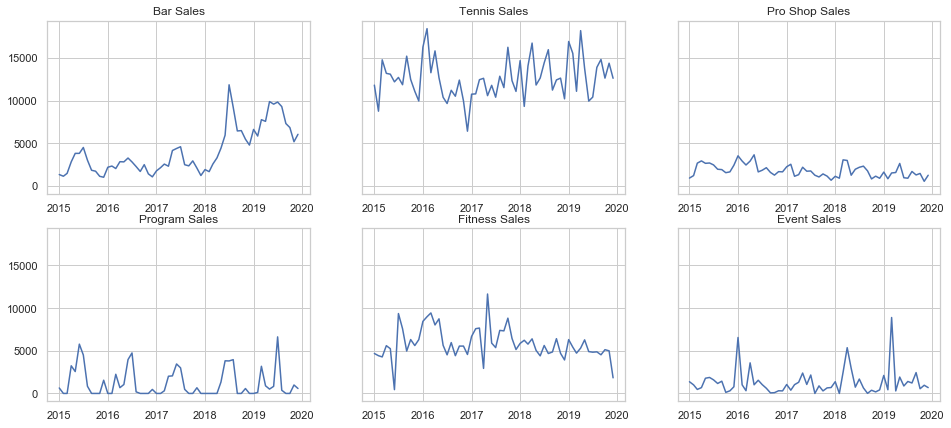

In [546]:
plt.figure(figsize=(16,7))
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2,3,figsize=(16,7),sharey=True)

ax1.plot(dg_bar.total.resample("MS").sum())
ax1.set(title="Bar Sales")

ax2.plot(dg_tennis.total.resample("MS").sum())
ax2.set(title="Tennis Sales")

ax3.plot(dg_ps.total.resample("MS").sum())
ax3.set(title="Pro Shop Sales")

ax4.plot(dg_program.total.resample("MS").sum())
ax4.set(title="Program Sales")

ax5.plot(dg_fitness.total.resample("MS").sum())
ax5.set(title="Fitness Sales")

ax6.plot(dg_event.total.resample("MS").sum())
ax6.set(title="Event Sales")

[Text(0.5, 1.0, 'Event Sales')]

<Figure size 1152x504 with 0 Axes>

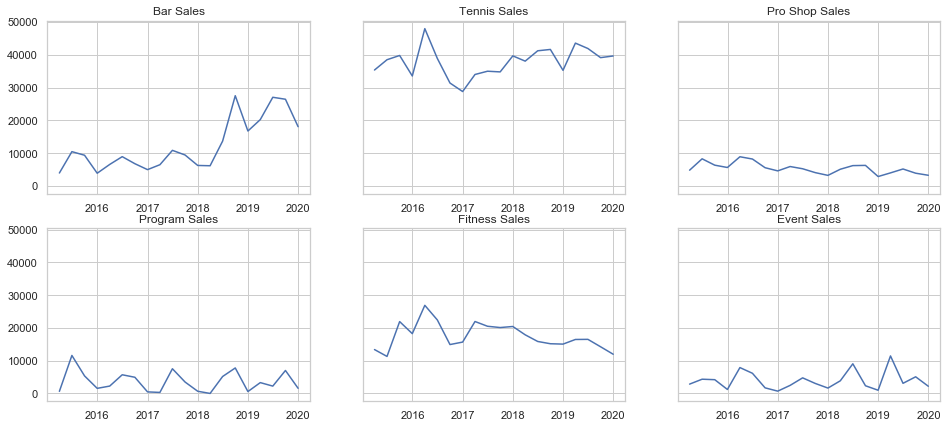

In [604]:
plt.figure(figsize=(16,7))
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2,3,figsize=(16,7),sharey=True)

ax1.plot(dg_bar.total.resample("Q").sum())
ax1.set(title="Bar Sales")

ax2.plot(dg_tennis.total.resample("Q").sum())
ax2.set(title="Tennis Sales")

ax3.plot(dg_ps.total.resample("Q").sum())
ax3.set(title="Pro Shop Sales")

ax4.plot(dg_program.total.resample("Q").sum())
ax4.set(title="Program Sales")

ax5.plot(dg_fitness.total.resample("Q").sum())
ax5.set(title="Fitness Sales")

ax6.plot(dg_event.total.resample("Q").sum())
ax6.set(title="Event Sales")

### Are there monthly and weekly sales seasonality?

In [547]:
df_bar = dft[dft.category == "Bar"]
df_tennis = dft[dft.category == "Tennis"]
df_program = dft[dft.category == "Program"]
df_ps = dft[dft.category == "Pro Shop"]
df_admin = dft[dft.category == "Admin"]
df_event = dft[dft.category == "Event"]
df_fitness = dft[dft.category == "Fitness"]

In [548]:
df_bar.head()

,acn,trans_id,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
timestamp,,,,,,,,,,,,,
2015-01-02 11:52:00,600,8272,$1 Snacks,Food & Consumables,1.00,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2015-01-02 11:52:00,483,8277,$1 Snacks,Food & Consumables,1.00,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2015-01-02 11:52:00,483,8278,$1 Snacks,Food & Consumables,1.00,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2015-01-02 12:14:00,998,8279,$1.75 Ice Cream,Food & Consumables,1.75,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2015-01-02 14:38:00,267,8280,$2.00 Ice Cream,Food & Consumables,2.00,General Property Owner,NaN,NaN,NaN,NaN,NaN,NaN,Bar


#### Quarterly Decomposition

<Figure size 1152x504 with 0 Axes>

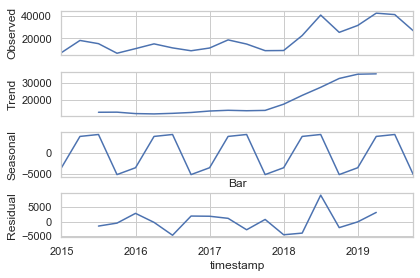

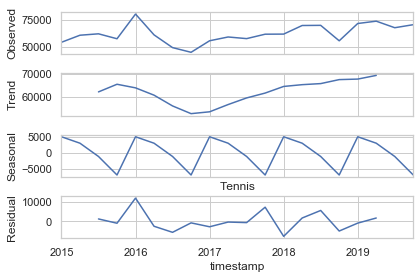

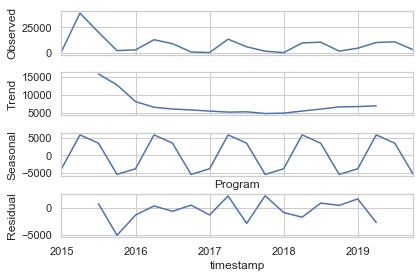

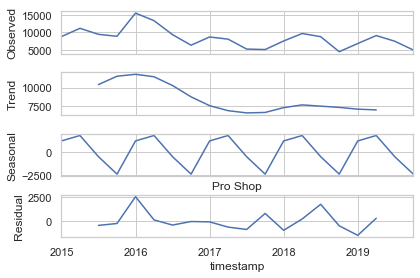

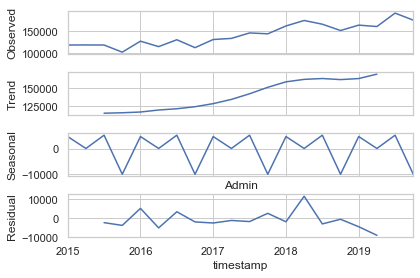

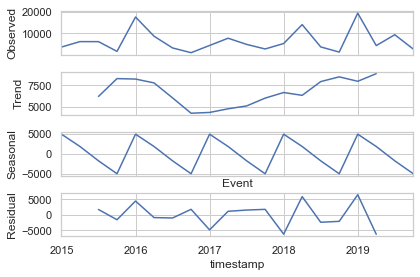

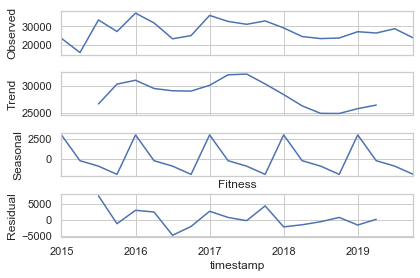

In [605]:
plt.figure(figsize=(16,7))
cat_subsets = [df_bar, df_tennis, df_program,df_ps, df_admin,df_event,df_fitness]

for i, subset in enumerate(cat_subsets):
    decomposition = sm.tsa.seasonal_decompose(subset["total"].resample('Q').sum(), model='additive')    
    fig = decomposition.plot()
    
    titles = {0:"Bar",1:"Tennis",2:"Program",3:"Pro Shop",4:"Admin",5:"Event",6:"Fitness"}
    fig.show()
    plt.title(f"{titles[i]}")

#### Monthly Decomposition

<Figure size 1152x504 with 0 Axes>

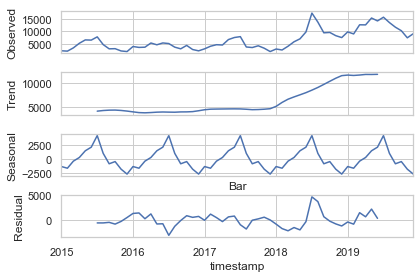

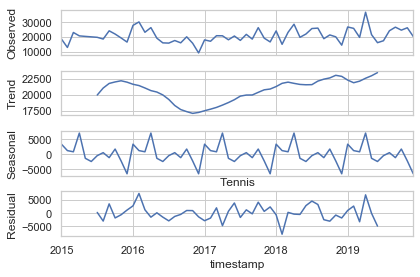

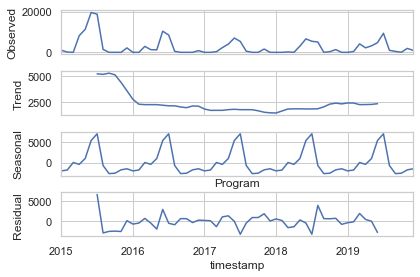

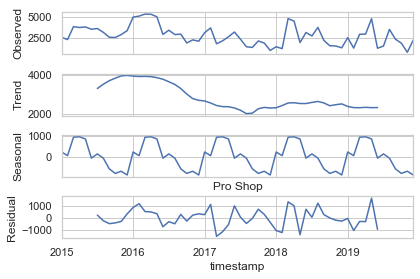

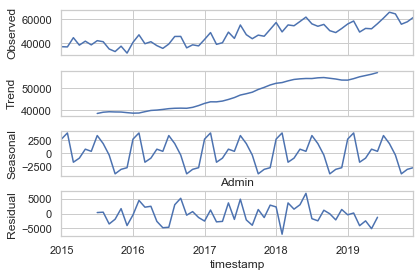

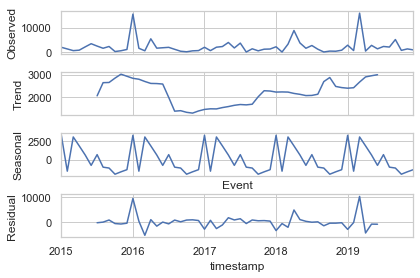

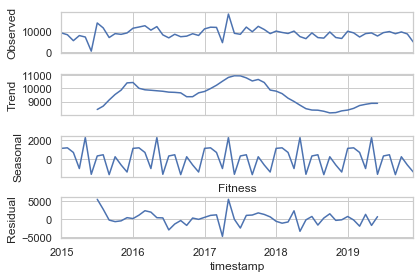

In [550]:
plt.figure(figsize=(16,7))
cat_subsets = [df_bar, df_tennis, df_program,df_ps, df_admin,df_event,df_fitness]

for i, subset in enumerate(cat_subsets):
    decomposition = sm.tsa.seasonal_decompose(subset["total"].resample('M').sum(), model='additive')    
    fig = decomposition.plot()
    
    titles = {0:"Bar",1:"Tennis",2:"Program",3:"Pro Shop",4:"Admin",5:"Event",6:"Fitness"}
    fig.show()
    plt.title(f"{titles[i]}")
    
# dft.resample("Y").sum().total.plot()

## Relationships

In [551]:
df.head()

,acn,trans_id,timestamp,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
0,11,37777,2015-08-12 16:03:00,Core Power,Beverage,2.80,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
1,11,38361,2015-08-21 08:02:00,Berries Amore,Beverage,4.28,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2,11,38360,2015-08-21 08:02:00,Smoothie Add-On,Beverage,0.67,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
3,11,35130,2015-07-24 11:53:00,$2.00 Ice Cream,Food & Consumables,2.00,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
4,11,35131,2015-07-24 11:53:00,$2.00 Ice Cream,Food & Consumables,2.00,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar


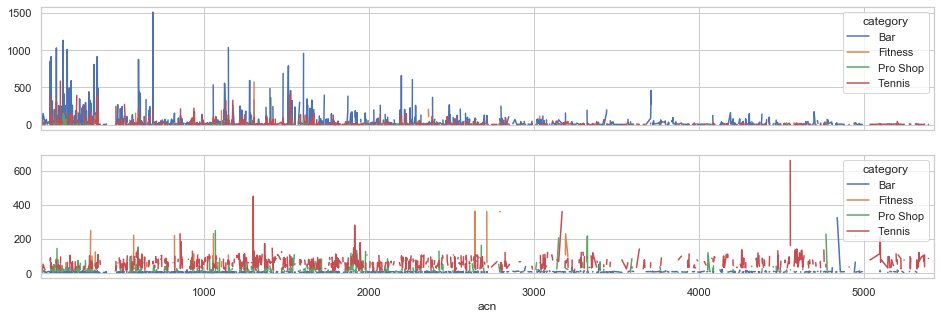

In [552]:
fig, (ax1,ax2)= plt.subplots(nrows=2, ncols=1, figsize=(16,5),sharex=True)

df[df.category.isin(["Tennis","Fitness","Bar","Pro Shop"])].groupby(['acn','category']).count()['total'].unstack().plot(ax=ax1)
df[df.category.isin(["Tennis","Fitness","Bar","Pro Shop"])].groupby(['acn','category']).mean()['total'].unstack().plot(ax=ax2)


plt.show()

---

In [576]:
dft["day"] = dft.index.strftime("%w %a")
dft["year"] = dft.index.strftime("%Y")

In [577]:
pd.pivot_table(dft,values="total",index="day",columns="category",aggfunc=[np.sum,margins=True)

category,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All
day,,,,,,,,
0 Sun,340455.08,31934.44,11829.91,10790.50,8884.64,1519.50,42388.53,447802.60
1 Mon,400483.01,66921.92,34071.54,102718.30,26019.07,47658.55,217021.81,894894.20
2 Tue,440337.88,59367.95,15702.53,84039.30,33789.91,27698.00,251599.48,912535.05
3 Wed,394211.11,55213.94,10732.12,121394.38,27202.20,25937.52,240913.83,875605.10
4 Thu,462306.16,60661.23,15025.60,92668.80,25245.69,21522.60,202184.52,879614.60
5 Fri,352354.67,51391.67,14209.03,126268.80,24892.75,24434.81,164477.63,758029.36
6 Sat,448305.54,64550.90,27906.56,17029.00,22192.60,11272.00,128670.57,719927.17
All,2838453.45,390042.05,129477.29,554909.08,168226.86,160042.98,1247256.37,5488408.08


In [578]:
pd.pivot_table(dft,values="total",index="year",columns="category",aggfunc=np.sum,margins=True)

category,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All
year,,,,,,,,
2015,458715.43,48245.24,17979.92,99960.68,38211.14,62580.28,234886.66,960579.35
2016,485546.46,47185.83,30758.63,116796.00,44506.87,25645.50,236021.52,986460.81
2017,554088.87,54714.70,20100.78,131726.00,26938.30,21256.00,234418.52,1043243.17
2018,651808.77,98097.53,24667.37,100659.00,30354.17,22065.00,257585.24,1185237.08
2019,688293.92,141798.75,35970.59,105767.40,28216.38,28496.20,284344.43,1312887.67
All,2838453.45,390042.05,129477.29,554909.08,168226.86,160042.98,1247256.37,5488408.08


In [581]:
pd.pivot_table(dft,values="total",index="year",columns="category",aggfunc=np.mean,margins=True)

category,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All
year,,,,,,,,
2015,144.842258,4.222409,20.834206,55.441309,25.835794,176.282479,50.135893,40.397819
2016,142.723827,5.017634,35.032608,63.683751,32.065468,127.589552,47.537063,44.692860
2017,138.073479,5.056811,24.754655,61.988706,22.467306,157.451852,48.393584,43.562852
2018,97.898584,5.522266,36.652853,53.400000,25.024048,123.268156,56.761842,36.014497
2019,89.284462,6.320426,36.817390,50.874170,24.926131,149.980000,60.026268,33.441699
All,113.770229,5.428636,30.805922,57.054193,26.240346,150.983943,52.474078,38.659745


In [583]:
pd.pivot_table(dft,values="acn",index="year",columns="category",aggfunc=np.sum,margins=True)

category,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All
year,,,,,,,,
2015,1168391,7018302,446221,1155049,937059,424372,3074119,14223513
2016,2475154,8154985,742488,1408091,1169382,216262,4677493,18843855
2017,4444823,11916298,984688,1789445,1243899,225292,5300852,25905297
2018,10405428,26460220,1057215,1988874,1736427,356868,6650382,48655414
2019,15446194,42466516,2323802,3750184,2044132,513390,9597499,76141717
All,33939990,96016321,5554414,10091643,7130899,1736184,29300345,183769796


In [592]:
spend = pd.pivot_table(dft,values="total",index="acn",columns="category",aggfunc=np.sum,margins=True,fill_value=0)

In [593]:
spend.head()

category,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All
acn,,,,,,,,
11,0.00,801.58,80.00,0.0,95.12,90.0,208.30,1275.00
17,0.00,9.50,0.00,0.0,10.00,0.0,30.00,49.50
23,0.00,1015.45,0.00,0.0,10.83,0.0,1614.26,2640.54
33,3341.25,247.31,105.12,0.0,52.94,0.0,36.00,3782.62
34,5231.80,14.28,2552.20,0.0,0.00,0.0,0.00,7798.28
